In [8]:
!pip install pandas
!pip install numpy

# **Import the required libraries**

In [10]:
import pandas as pd
import numpy as np

# **Load the Dataset**

In [2]:
import pandas as pd

df = pd.read_csv("Customer-Churn-Records.csv")



# Checking the dimensions of the dataset

In [11]:
df.shape

(10000, 18)

# Check Data Types of the data

In [12]:
print(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


# Printing the first 5 rows to get an idea of the data

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Find the missing values

In [24]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Now that there are no missing values, let's check for duplicate rows and remove them.

In [15]:
duplicate_count = df.duplicated().sum()
print(f"number of duplicated rows: {duplicate_count}")

if duplicate_count>0:
    df.drop_duplicates(inplace=True)

number of duplicated rows: 0


# Now drop 'RowNumber', 'CustomerId', 'Surname' because these columns do not contribute any meaningful insight to the analysis

In [17]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

### Set Global float display format (2 Decimal Places)

In [20]:
pd.set_option('display.float_format', lambda x: f"{x:.2f}")

# describe the data

In [21]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20,0.20,3.01,606.52
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40,0.40,1.41,225.92
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00,0.00,1.00,119.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00,0.00,2.00,410.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00,0.00,3.00,605.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00,0.00,4.00,801.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00,1.00,5.00,1000.00


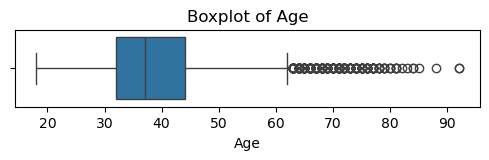

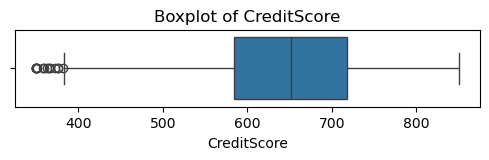

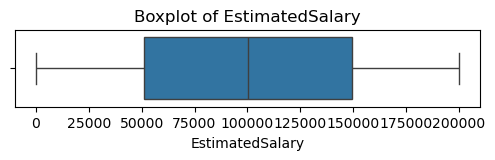

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'CreditScore', 'EstimatedSalary']
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### 🔎 Outlier Analysis Summary

1. **Age**: Outliers present on the higher end (ages above ~60). These may be valid older customers. We'll retain them but analyze their churn behavior separately.
2. **Credit Score**: A few outliers exist on the lower end (scores below ~400). These could indicate high-risk customers.
3. **Estimated Salary**: No outliers observed. The salary data is clean and evenly distributed.


In [23]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [25]:
df.to_csv('./customer_churn_cleaned.csv', index=False)